# Import Librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data

Our goal will be to predict the price of a property using various features.

In [2]:
# !kaggle datasets download -d dansbecker/melbourne-housing-snapshot

In [3]:
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


<Axes: >

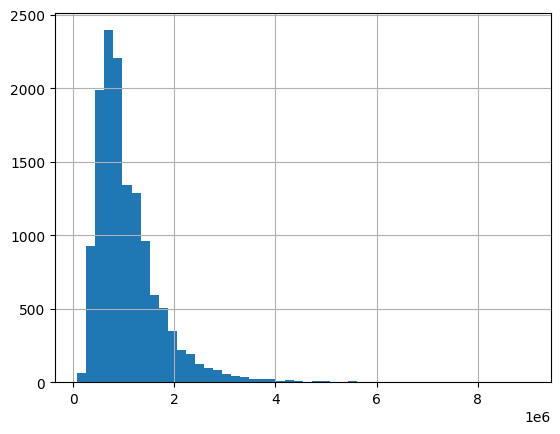

In [4]:
df['Price'].hist(bins=50)

In [5]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In order to simplify this problem, let's keep only a subset of the columns.

In [6]:
df = df[['Rooms','Price','Distance','Type','Lattitude','Longtitude','BuildingArea']]
df.head()

,Rooms,Price,Distance,Type,Lattitude,Longtitude,BuildingArea
0,2,1480000.0,2.5,h,-37.7996,144.9984,NaN
1,2,1035000.0,2.5,h,-37.8079,144.9934,79.0
2,3,1465000.0,2.5,h,-37.8093,144.9944,150.0
3,3,850000.0,2.5,h,-37.7969,144.9969,NaN
4,4,1600000.0,2.5,h,-37.8072,144.9941,142.0


# Basic cleaning

In [7]:
df.isna().sum()

Rooms              0
Price              0
Distance           0
Type               0
Lattitude          0
Longtitude         0
BuildingArea    6450
dtype: int64

In [8]:
df.loc[:,"BuildingArea"] = df["BuildingArea"].median()

In [9]:
df.isna().sum()

Rooms           0
Price           0
Distance        0
Type            0
Lattitude       0
Longtitude      0
BuildingArea    0
dtype: int64

Let's encode the type, which is a categorical feature.

In [10]:
df['Type'].unique()

array(['h', 'u', 't'], dtype=object)

In [11]:
df['Type'].value_counts()

h    9449
u    3017
t    1114
Name: Type, dtype: int64

In [12]:
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(sparse=False)

In [13]:
encoding = OH_encoder.fit_transform(df[["Type"]])
encoding

/home/jean/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [14]:
OH_encoder.categories_

[array(['h', 't', 'u'], dtype=object)]

In [15]:
cols = pd.DataFrame(encoding, columns=['h', 't', 'u'])
cols

,h,t,u
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
13575,1.0,0.0,0.0
13576,1.0,0.0,0.0
13577,1.0,0.0,0.0
13578,1.0,0.0,0.0


In [16]:
df_prepared = df.join(cols).drop(['Type'], axis = 1)
df_prepared

,Rooms,Price,Distance,Lattitude,Longtitude,BuildingArea,h,t,u
0,2,1480000.0,2.5,-37.79960,144.99840,126.0,1.0,0.0,0.0
1,2,1035000.0,2.5,-37.80790,144.99340,126.0,1.0,0.0,0.0
2,3,1465000.0,2.5,-37.80930,144.99440,126.0,1.0,0.0,0.0
3,3,850000.0,2.5,-37.79690,144.99690,126.0,1.0,0.0,0.0
4,4,1600000.0,2.5,-37.80720,144.99410,126.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
13575,4,1245000.0,16.7,-37.90562,145.16761,126.0,1.0,0.0,0.0
13576,3,1031000.0,6.8,-37.85927,144.87904,126.0,1.0,0.0,0.0
13577,3,1170000.0,6.8,-37.85274,144.88738,126.0,1.0,0.0,0.0
13578,4,2500000.0,6.8,-37.85908,144.89299,126.0,1.0,0.0,0.0


# Data Split

In [17]:
df_prepared.shape

(13580, 9)

In [18]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

Basic split :

In [19]:
train_set, test_set = train_test_split(df_prepared, test_size=0.2)

In [20]:
X_train = train_set.drop(['Price'], axis = 1)
Y_train = train_set['Price']
X_test = train_set.drop(['Price'], axis = 1)
Y_test = train_set['Price']

In [21]:
X_train.head()

,Rooms,Distance,Lattitude,Longtitude,BuildingArea,h,t,u
11142,2,1.8,-37.79878,144.94747,126.0,0.0,0.0,1.0
12835,4,19.9,-37.80040,145.23257,126.0,1.0,0.0,0.0
1322,2,5.2,-37.75830,144.97560,126.0,0.0,0.0,1.0
4077,3,6.9,-37.76740,144.90840,126.0,1.0,0.0,0.0
4924,2,8.8,-37.72930,144.99310,126.0,0.0,0.0,1.0


# Model Definition

In [22]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()

# Model Training

In [23]:
lin_model.fit(X_train,Y_train)

LinearRegression()

# Model Prediction

In [24]:
y_pred = lin_model.predict(X_test)

In [25]:
y_pred.shape

(10864,)

In [26]:
y_test_np = Y_test.array
y_test_np.shape

(10864,)

# Mean Square Error

In [42]:
MSE = np.mean((y_pred-y_test_np)**2)
MSE

203959038506.21512

In [43]:
np.sqrt(MSE)

451618.24421320175

In [28]:
MSE = np.mean(y_pred-y_test_np)**2
MSE

6.363830857317274e-16

In [29]:
np.mean(y_pred-y_test_np)

2.5226634451145627e-08

In [30]:
np.max(y_pred-y_test_np)

2169127.9997042418

In [31]:
np.min(y_pred-y_test_np)

-7775586.165981472

Attention à ne pas tomber dans ce piège ! 

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 1.000e+00, 3.000e+00, 4.000e+00, 6.000e+00,
        7.000e+00, 5.000e+00, 1.000e+00, 1.100e+01, 2.300e+01, 1.500e+01,
        3.500e+01, 4.400e+01, 7.900e+01, 1.150e+02, 1.340e+02, 2.460e+02,
        4.490e+02, 8.990e+02, 2.002e+03, 3.077e+03, 2.415e+03, 9.560e+02,
        2.560e+02, 4.700e+01, 1.800e+01, 4.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00]),
 array([-7775586.16598147, -7576691.88266776, -7377797.59935404,
        -7178903.31604033, -6980009.03272661, -6781114.7494129 ,
        -6582220.46609919, -6383326.18278547, -6184431.89947176,
        -5985537.61615804, -5786643.33284433, -5587749.04953061,
        -5388854.7662169 , -5189960.48290319, -4991066.19958947,
        -4792171.91627576, -4593277.63296204, -4394

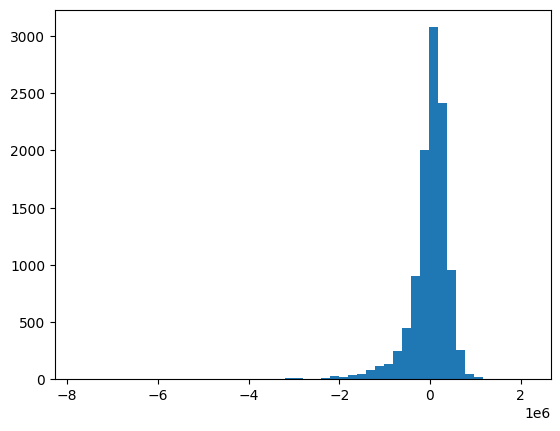

In [32]:
plt.hist(y_pred-y_test_np, bins=50)

# Regularization

## LASSO Regularization (L1-penalization)

In [67]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=1e3) # if alpha is not at least 1e3, it has no effect
# it is mostly because the values of price are huge and I haven't rescaled them

In [68]:
lasso_reg.fit(X_train,Y_train)

Lasso(alpha=1000.0)

In [69]:
y_pred_lasso = lasso_reg.predict(X_test)

### MSE

In [70]:
MSE = np.mean((y_pred_lasso-y_test_np)**2)
MSE

204181456442.25174

In [71]:
np.sqrt(MSE)

451864.4226338822

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 1.000e+00, 3.000e+00, 4.000e+00, 6.000e+00,
        7.000e+00, 5.000e+00, 2.000e+00, 9.000e+00, 2.400e+01, 1.500e+01,
        3.700e+01, 4.700e+01, 7.700e+01, 1.110e+02, 1.430e+02, 2.430e+02,
        4.590e+02, 9.050e+02, 2.052e+03, 3.124e+03, 2.389e+03, 8.960e+02,
        2.340e+02, 4.100e+01, 1.500e+01, 3.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00]),
 array([-7800485.62928456, -7600767.04292814, -7401048.45657172,
        -7201329.8702153 , -7001611.28385888, -6801892.69750245,
        -6602174.11114603, -6402455.52478961, -6202736.93843319,
        -6003018.35207677, -5803299.76572035, -5603581.17936393,
        -5403862.59300751, -5204144.00665109, -5004425.42029466,
        -4804706.83393824, -4604988.24758182, -4405

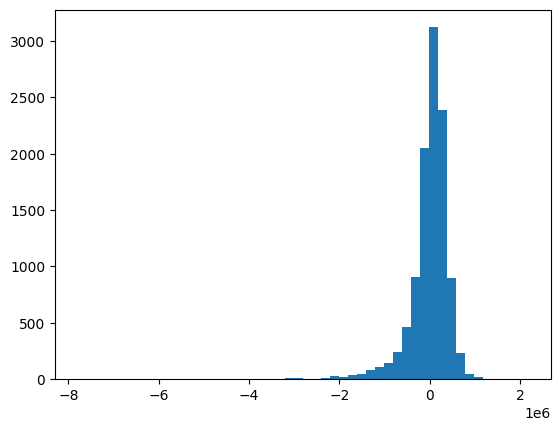

In [72]:
plt.hist(y_pred_lasso-y_test_np, bins=50)

# Improvements of data split

<Axes: >

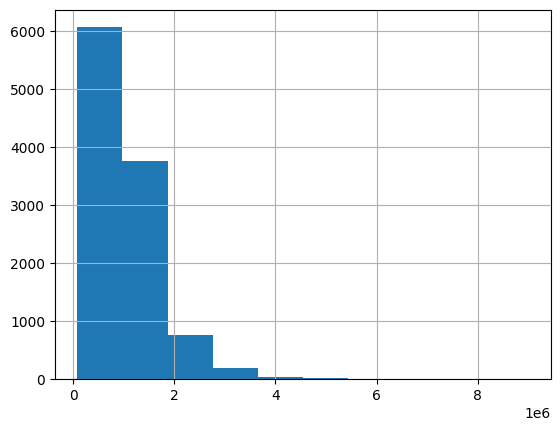

In [36]:
train_set["Price"].hist(bins=10)

In [ ]:
test_set["Price"].hist(bins=10)

Even if the plots are not very detailed, we observe that the distributions are not the same. The original distribution was : 

In [ ]:
n, bins, _ = plt.hist(df['Price'], bins = 10)

It's closer to the train set distribution. To fix this issue, let's use the StratifiedShuffle splitter. First we need to categorise the data.

In [ ]:
bins

In [ ]:
bins[-1] = np.inf
bins

In [ ]:
df["price_cat"] = pd.cut(df["Price"], bins = bins, labels = list(range(10)))
df.head()

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_index, test_idx in split.split(df, df['price_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]